In this notbook, I compare the estimates of apparent proper motion of radio sources from two algorithms:
    
    - fit the proper motion in the R.A. and decl.;
    
    - fit the total proper motion.

I also compare the results of different limit used to remove the outliers.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

import seaborn as sns

import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.table import Table

In [2]:
apm_tab = Table.read("../data/ts_pm_fit_4_test.dat", format="ascii")

Calculate the total proper motion from $\mu_{\alpha*}$ and $\mu_{\delta}$.

In [3]:
pm_ra, pmra_err = apm_tab["pm_ra"], apm_tab["pmra_err"]
pm_dec, pmdec_err = apm_tab["pm_dec"], apm_tab["pmdec_err"]

# Total proper motion
pm2 = pm_ra**2 + pm_dec**2
pm = np.sqrt(pm2)
pm_err = np.sqrt(pm_ra**2 * pmra_err**2 + 
                 pm_dec**2 * pmdec_err**2) / pm

Calculate the orientation of the proper motion vector from $\mu_{\alpha*}$ and $\mu_{\delta}$.

In [4]:
cen = SkyCoord(0*u.deg, 0*u.deg, frame="icrs")
oft = SkyCoord(pm_ra*u.deg, pm_dec*u.deg, frame="icrs")

pa = cen.position_angle(oft)
pa_deg = pa.to(u.deg).value

# Formal error
pa_err = np.sqrt(pm_dec**2 * pmra_err**2 + 
                 pm_ra**2 * pmdec_err**2) / pm2
pa_err_deg = np.rad2deg(pa_err)

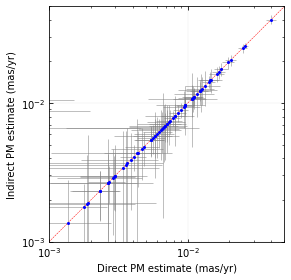

In [5]:
fig, ax = plt.subplots()

ax.errorbar(apm_tab["pm"], pm, xerr=apm_tab["pm_err"], yerr=pm_err, fmt="bo", elinewidth=0.5, ms=2, ecolor="grey")
x = np.arange(0, 1, 0.1)
ax.plot(x, x, "r--", lw=0.5)

ax.axis("square")
ax.axis([0.001, 0.05, 0.001, 0.05])

ax.set_xscale("log")
ax.set_yscale("log")

ax.grid()

ax.set_xlabel("Direct PM estimate (mas/yr)")
ax.set_ylabel("Indirect PM estimate (mas/yr)")
plt.tight_layout()

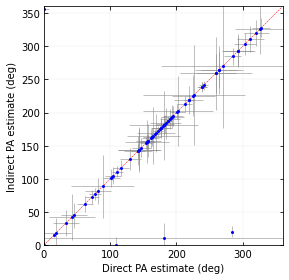

In [6]:
fig, ax = plt.subplots()

ax.errorbar(apm_tab["pa"], pa_deg, xerr=apm_tab["pa_err"], yerr=pa_err_deg, 
            fmt="bo",
            elinewidth=0.5,
            ms=2,
            ecolor="grey")

x = np.arange(0, 360, 1)
ax.plot(x, x, "r--", lw=0.5)

ax.axis("square")
ax.axis([0, 360, 0, 360])

ax.set_xlabel("Direct PA estimate (deg)")
ax.set_ylabel("Indirect PA estimate (deg)")
ax.grid()
plt.tight_layout()

In the end, I found no significant difference.

When we use $N$-sigma principle to remove the outliers, the fitted value of proper motion may varies.

I try N = 1, 3, 5, 10, infinite (that is, no outliers).

In [7]:
apm_tab = Table.read("../data/ts_nju_pm_fit_1000sigma-10step.dat",
                     format="ascii.csv")
apm_tab1 = Table.read("../data/ts_nju_pm_fit_1sigma-10step.dat",
                      format="ascii.csv")
apm_tab3 = Table.read("../data/ts_nju_pm_fit_3sigma-10step.dat",
                      format="ascii.csv")
apm_tab5 = Table.read("../data/ts_nju_pm_fit_5sigma-10step.dat",
                      format="ascii.csv")
apm_tab10 = Table.read("../data/ts_nju_pm_fit_10sigma-10step.dat",
                       format="ascii.csv")

From top to bottom
1-sigma
3-sigma
5-sigma
10-sigma
No outlier


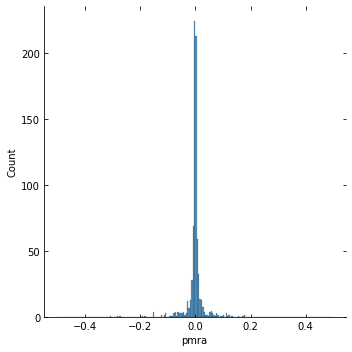

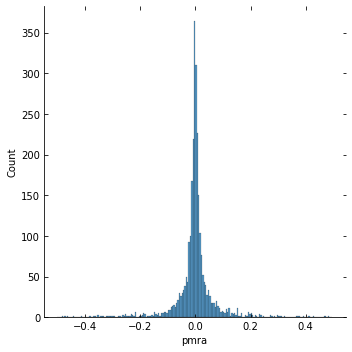

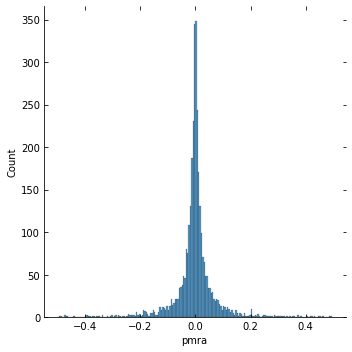

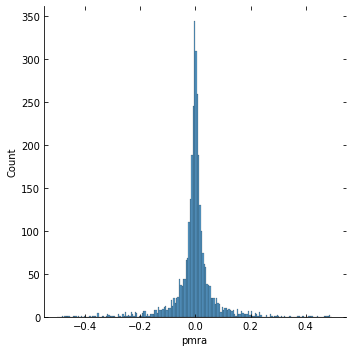

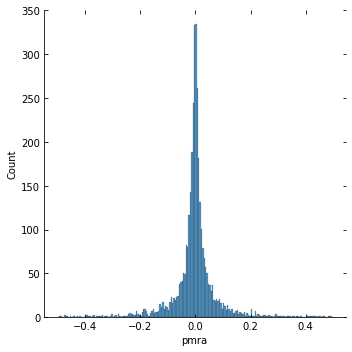

In [47]:
print("From top to bottom")
print("1-sigma")
print("3-sigma")
print("5-sigma")
print("10-sigma")
print("No outlier")

sns.displot(x=apm_tab1["pmra"], bins=np.arange(-0.5, 0.5, 0.005))
sns.displot(x=apm_tab3["pmra"], bins=np.arange(-0.5, 0.5, 0.005))
sns.displot(x=apm_tab5["pmra"], bins=np.arange(-0.5, 0.5, 0.005))
sns.displot(x=apm_tab10["pmra"], bins=np.arange(-0.5, 0.5, 0.005))
sns.displot(x=apm_tab["pmra"], bins=np.arange(-0.5, 0.5, 0.005))

From top to bottom
1-sigma
3-sigma
5-sigma
10-sigma
No outlier


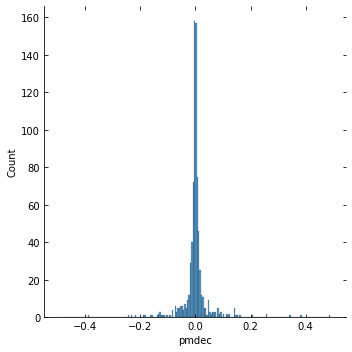

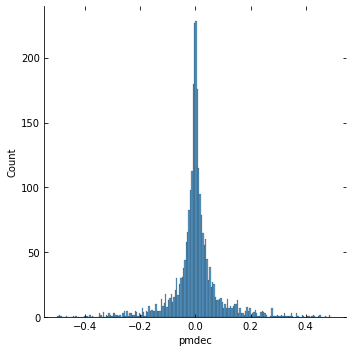

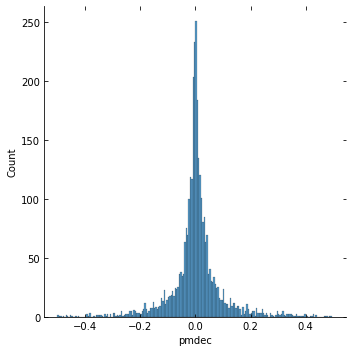

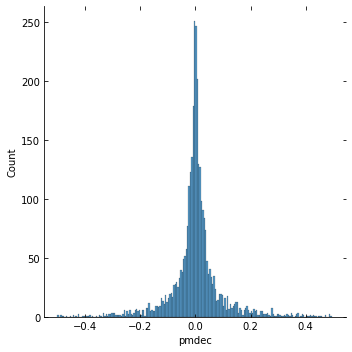

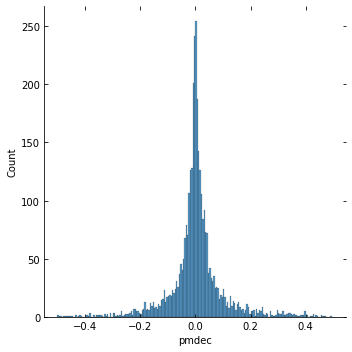

In [48]:
print("From top to bottom")
print("1-sigma")
print("3-sigma")
print("5-sigma")
print("10-sigma")
print("No outlier")

sns.displot(x=apm_tab1["pmdec"], bins=np.arange(-0.5, 0.5, 0.005))
sns.displot(x=apm_tab3["pmdec"], bins=np.arange(-0.5, 0.5, 0.005))
sns.displot(x=apm_tab5["pmdec"], bins=np.arange(-0.5, 0.5, 0.005))
sns.displot(x=apm_tab10["pmdec"], bins=np.arange(-0.5, 0.5, 0.005))
sns.displot(x=apm_tab["pmdec"], bins=np.arange(-0.5, 0.5, 0.005))

In [43]:
# Fit a normal distribution to the data

# No outlier
mu_ra, std_ra = norm.fit(apm_tab["pmra"])
mu_dec, std_dec = norm.fit(apm_tab["pmdec"])
med_ra = np.median(apm_tab["pmra"])
med_dec = np.median(apm_tab["pmdec"])

# 1-sigma
mask = (apm_tab1["pmra"].mask == False)
mu_ra1, std_ra1 = norm.fit(apm_tab1["pmra"][mask])
mu_dec1, std_dec1 = norm.fit(apm_tab1["pmdec"][mask])
med_ra1 = np.median(apm_tab1["pmra"][mask])
med_dec1 = np.median(apm_tab1["pmdec"][mask])

# 3-sigma
mask = (apm_tab3["pmra"].mask == False)
mu_ra3, std_ra3 = norm.fit(apm_tab3["pmra"][mask])
mu_dec3, std_dec3 = norm.fit(apm_tab3["pmdec"][mask])
med_ra3 = np.median(apm_tab3["pmra"][mask])
med_dec3 = np.median(apm_tab3["pmdec"][mask])

# 5-sigma
mask = (apm_tab5["pmra"].mask == False)
mu_ra5, std_ra5 = norm.fit(apm_tab5["pmra"][mask])
mu_dec5, std_dec5 = norm.fit(apm_tab5["pmdec"][mask])
med_ra5 = np.median(apm_tab5["pmra"][mask])
med_dec5 = np.median(apm_tab5["pmdec"][mask])

# 10-sigma
mask = (apm_tab10["pmra"].mask == False)
mu_ra10, std_ra10 = norm.fit(apm_tab10["pmra"][mask])
mu_dec10, std_dec10 = norm.fit(apm_tab10["pmdec"][mask])
med_ra10 = np.median(apm_tab10["pmra"][mask])
med_dec10 = np.median(apm_tab10["pmdec"][mask])

In [44]:
mu_ra = [mu_ra1, mu_ra3, mu_ra5, mu_ra10, mu_ra]
mu_dec = [mu_dec1, mu_dec3, mu_dec5, mu_dec10, mu_dec]

std_ra = [std_ra1, std_ra3, std_ra5, std_ra10, std_ra]
std_dec = [std_dec1, std_dec3, std_dec5, std_dec10, std_dec]

med_ra = [med_ra1, med_ra3, med_ra5, med_ra10, med_ra]
med_dec = [med_dec1, med_dec3, med_dec5, med_dec10, med_dec]

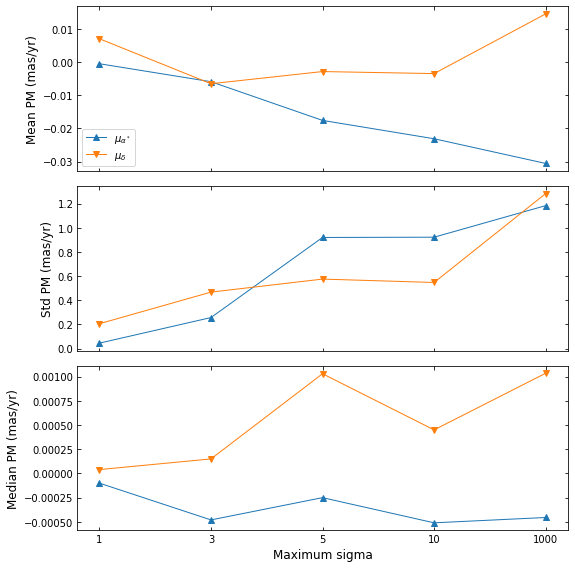

In [45]:
x_axis = np.arange(len(mu_ra))
x_label = ["1", "3", "5", "10", "1000"]

fig, (ax0, ax1, ax2) = plt.subplots(figsize=(8, 8), nrows=3, sharex=True)

ax0.plot(x_axis, mu_ra, "-^", lw=1, label="$\\mu_{\\alpha^*}$")
ax0.plot(x_axis, mu_dec, "-v", lw=1, label="$\\mu_{\\delta}$")

ax1.plot(x_axis, std_ra, "-^", lw=1, label="$\\mu_{\\alpha^*}$")
ax1.plot(x_axis, std_dec, "-v", lw=1, label="$\\mu_{\\delta}$")

ax2.plot(x_axis, med_ra, "-^", lw=1, label="$\\mu_{\\alpha^*}$")
ax2.plot(x_axis, med_dec, "-v", lw=1, label="$\\mu_{\\delta}$")

ax2.set_xticks(x_axis)
ax2.set_xticklabels(x_label)

ax2.set_xlabel("Maximum sigma", fontsize=12)
ax0.set_ylabel("Mean PM (mas/yr)", fontsize=12)
ax1.set_ylabel("Std PM (mas/yr)", fontsize=12)
ax2.set_ylabel("Median PM (mas/yr)", fontsize=12)

ax0.legend()

plt.tight_layout()